In [59]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [60]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [62]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [63]:
len(np.unique(y_train))

43

In [64]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

y_train.shape

(34799, 43)

In [0]:
input_shape = X_train.shape[1:]
num_class = y_train.shape[1]

In [66]:
model = Sequential([            
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
       Flatten(),
       Dense (num_class, activation='softmax')          
])

#model.summary()
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 8s 7ms/step - loss: 11.5120 - accuracy: 0.7990


In [0]:
def get_cnn_vl(input_shape, num_class):
  return Sequential([            
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
       Flatten(),
       Dense (num_class, activation='softmax')          
])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
  
  model.fit(X_train,
            y_train,
            batch_size=params_fit.get('batch_size', 128),
            epochs=params_fit.get('epochs', 5),
            verbose=params_fit.get('verbose', 1),
            validation_data=params_fit.get('validation_data', (X_train, y_train)),
            callbacks= [tensorboard_callback]
  )
  return model

In [68]:
model = get_cnn_vl(input_shape, num_class)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 27.4050 - accuracy: 0.7524 - val_loss: 0.2499 - val_accuracy: 0.9416
Epoch 2/5
272/272 [==============================] - 6s 24ms/step - loss: 0.2161 - accuracy: 0.9518 - val_loss: 0.1103 - val_accuracy: 0.9718
Epoch 3/5
272/272 [==============================] - 6s 24ms/step - loss: 0.1226 - accuracy: 0.9721 - val_loss: 0.0801 - val_accuracy: 0.9851
Epoch 4/5
272/272 [==============================] - 6s 24ms/step - loss: 0.1180 - accuracy: 0.9760 - val_loss: 0.0643 - val_accuracy: 0.9846
Epoch 5/5
272/272 [==============================] - 6s 24ms/step - loss: 0.1041 - accuracy: 0.9766 - val_loss: 0.0603 - val_accuracy: 0.9855


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
  y_test_norm = np.argmax( y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax( y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [70]:
predict(model_trained, X_test, y_test)                        #

0.8523809523809524

In [0]:
def train_and_predict (model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)


In [77]:
def get_cnn_v2(input_shape, num_class):
  return Sequential([            
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
       MaxPool2D(),
       
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),

       Dense (1024, activation='relu'),
       Dropout(0.3),

       Dense (num_class, activation='softmax')          
])

train_and_predict( get_cnn_v2(input_shape, num_class ))

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.5496 - accuracy: 0.6236 - val_loss: 0.4536 - val_accuracy: 0.8973
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5224 - accuracy: 0.8515 - val_loss: 0.1573 - val_accuracy: 0.9672
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.3188 - accuracy: 0.9110 - val_loss: 0.0838 - val_accuracy: 0.9810
Epoch 4/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2450 - accuracy: 0.9307 - val_loss: 0.0737 - val_accuracy: 0.9844
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1871 - accuracy: 0.9462 - val_loss: 0.0416 - val_accuracy: 0.9927


0.9113378684807256

In [78]:
def get_cnn_v3(input_shape, num_class):
  return Sequential([            
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),

       Dense (1024, activation='relu'),
       Dropout(0.3),

       Dense (num_class, activation='softmax')          
])

train_and_predict( get_cnn_v3(input_shape, num_class ))

Epoch 1/5
272/272 [==============================] - 10s 37ms/step - loss: 1.1010 - accuracy: 0.7629 - val_loss: 0.0876 - val_accuracy: 0.9816
Epoch 2/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1498 - accuracy: 0.9595 - val_loss: 0.0354 - val_accuracy: 0.9914
Epoch 3/5
272/272 [==============================] - 10s 35ms/step - loss: 0.0803 - accuracy: 0.9790 - val_loss: 0.0194 - val_accuracy: 0.9965
Epoch 4/5
272/272 [==============================] - 10s 35ms/step - loss: 0.0740 - accuracy: 0.9799 - val_loss: 0.0188 - val_accuracy: 0.9954
Epoch 5/5
272/272 [==============================] - 10s 35ms/step - loss: 0.0543 - accuracy: 0.9857 - val_loss: 0.0073 - val_accuracy: 0.9980


0.9664399092970521

In [83]:
def get_cnn_v4(input_shape, num_class):
  return Sequential([            
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
       MaxPool2D(),
       Dropout(0.3),
       
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       Dropout(0.3),


       Flatten(),

       Dense (1024, activation='relu'),
       Dropout(0.3),

       Dense (num_class, activation='softmax')          
])

#get_cnn_v4(input_shape, num_class ).summary()
train_and_predict( get_cnn_v4(input_shape, num_class ))

Epoch 1/5
272/272 [==============================] - 12s 45ms/step - loss: 2.2903 - accuracy: 0.3667 - val_loss: 0.6795 - val_accuracy: 0.8161
Epoch 2/5
272/272 [==============================] - 12s 43ms/step - loss: 0.6163 - accuracy: 0.8084 - val_loss: 0.1522 - val_accuracy: 0.9576
Epoch 3/5
272/272 [==============================] - 12s 43ms/step - loss: 0.2918 - accuracy: 0.9129 - val_loss: 0.0649 - val_accuracy: 0.9849
Epoch 4/5
272/272 [==============================] - 12s 43ms/step - loss: 0.1819 - accuracy: 0.9462 - val_loss: 0.0401 - val_accuracy: 0.9878
Epoch 5/5
272/272 [==============================] - 12s 43ms/step - loss: 0.1386 - accuracy: 0.9587 - val_loss: 0.0313 - val_accuracy: 0.9907


0.9616780045351474

In [96]:
def get_cnn_v5(input_shape, num_class):
  return Sequential([            
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
       Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
       MaxPool2D(),
       Dropout(0.3),
       
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       Dropout(0.3),

       Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
       Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
       MaxPool2D(),
       Dropout(0.3),

       Flatten(),

       Dense (1024, activation='relu'),
       Dropout(0.3),
       Dense (1024, activation='relu'),
       Dropout(0.3),

       Dense (num_class, activation='softmax')          
])

train_and_predict( get_cnn_v5(input_shape, num_class ))

Epoch 1/5
272/272 [==============================] - 13s 46ms/step - loss: 2.5836 - accuracy: 0.2915 - val_loss: 1.0636 - val_accuracy: 0.6701
Epoch 2/5
272/272 [==============================] - 12s 45ms/step - loss: 0.7505 - accuracy: 0.7579 - val_loss: 0.1374 - val_accuracy: 0.9626
Epoch 3/5
272/272 [==============================] - 12s 45ms/step - loss: 0.3199 - accuracy: 0.9015 - val_loss: 0.0566 - val_accuracy: 0.9847
Epoch 4/5
272/272 [==============================] - 12s 45ms/step - loss: 0.2077 - accuracy: 0.9385 - val_loss: 0.0368 - val_accuracy: 0.9888
Epoch 5/5
272/272 [==============================] - 12s 45ms/step - loss: 0.1678 - accuracy: 0.9522 - val_loss: 0.0219 - val_accuracy: 0.9943


0.9736961451247166

In [86]:

X_train[0].shape

(32, 32, 3)

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1) #robimy z kolorowych czarno-białe
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [98]:
model = get_cnn_v5((32, 32, 1), num_class)          #input_shape się zmienia bo mamy szare
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 13s 46ms/step - loss: 2.5364 - accuracy: 0.2735 - val_loss: 0.7764 - val_accuracy: 0.7705
Epoch 2/5
272/272 [==============================] - 12s 46ms/step - loss: 0.6499 - accuracy: 0.7897 - val_loss: 0.2368 - val_accuracy: 0.9292
Epoch 3/5
272/272 [==============================] - 12s 45ms/step - loss: 0.3063 - accuracy: 0.9023 - val_loss: 0.0849 - val_accuracy: 0.9764
Epoch 4/5
272/272 [==============================] - 12s 45ms/step - loss: 0.2018 - accuracy: 0.9364 - val_loss: 0.0484 - val_accuracy: 0.9851
Epoch 5/5
272/272 [==============================] - 12s 45ms/step - loss: 0.1441 - accuracy: 0.9545 - val_loss: 0.0350 - val_accuracy: 0.9891


0.9648526077097506

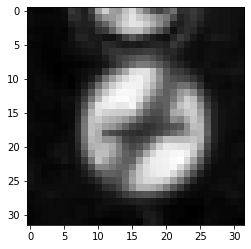

In [90]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'));

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img  

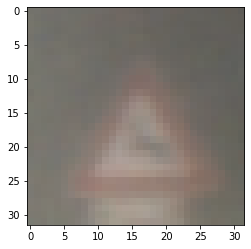

In [101]:
plt.imshow( X_train[400])

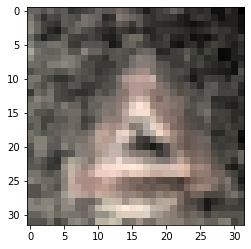

In [103]:
plt.imshow( preproc_img( X_train[400]));

In [0]:
X_train_prp = X_train.copy().astype(np.float32)
X_test_prp = X_test.copy().astype(np.float32)

In [106]:
model = get_cnn_v5(input_shape, num_class)          #input shape
model_trained = train_model(model, X_train_prp, y_train, params_fit={})
predict(model_trained, X_test_prp, y_test)

Epoch 1/5
272/272 [==============================] - 13s 47ms/step - loss: 2.7051 - accuracy: 0.2595 - val_loss: 1.1263 - val_accuracy: 0.6593
Epoch 2/5
272/272 [==============================] - 12s 46ms/step - loss: 0.8769 - accuracy: 0.7243 - val_loss: 0.2123 - val_accuracy: 0.9343
Epoch 3/5
272/272 [==============================] - 13s 46ms/step - loss: 0.3767 - accuracy: 0.8825 - val_loss: 0.0833 - val_accuracy: 0.9769
Epoch 4/5
272/272 [==============================] - 13s 46ms/step - loss: 0.2499 - accuracy: 0.9249 - val_loss: 0.0480 - val_accuracy: 0.9848
Epoch 5/5
272/272 [==============================] - 12s 46ms/step - loss: 0.1899 - accuracy: 0.9446 - val_loss: 0.0565 - val_accuracy: 0.9834


0.9551020408163265

Helpful things

In [30]:
np.sum([1.6497183e-12, 9.9999464e-01, 1.8270101e-11, 1.1284875e-12,
       5.3363738e-06, 3.1125629e-12, 1.4666357e-15, 1.8330580e-12,
       8.4945173e-24, 1.9354716e-19, 1.8368517e-16, 3.3556490e-24,
       2.7895900e-26, 6.2927609e-22, 1.7757372e-18, 1.1009387e-30,
       1.4534052e-19, 0.0000000e+00, 6.6550558e-22, 1.3383895e-32,
       1.4881763e-29, 1.0520798e-21, 0.0000000e+00, 2.1774750e-38,
       1.1491041e-31, 4.0018525e-26, 2.3009535e-21, 0.0000000e+00,
       5.6496409e-16, 1.3981161e-18, 5.5707970e-32, 6.0759328e-29,
       5.1254222e-26, 3.7864183e-20, 1.2186971e-31, 3.6960175e-25,
       9.5295116e-29, 1.5110422e-35, 3.9526772e-35, 1.8960171e-34,
       2.1775574e-31, 7.5886677e-29, 9.6765551e-21])                    #suma prawdopodobieństw powinna  = 1

0.9999999763997962

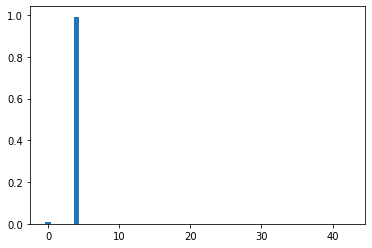

In [50]:
plt.bar(range(43), y_pred_prob[400]);

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [47]:
np.argmax( y_pred_prob[400]) # np.argmax zwraca index max elementu

4

In [48]:
labels_dict[np.argmax( y_pred_prob[400])]  

'Speed limit (70km/h)'

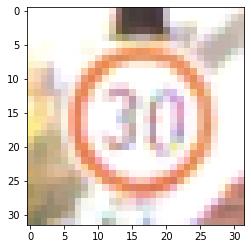

In [49]:
plt.imshow(X_test[400])

In [24]:
df.to_dict()['b']

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st